## Notebook for pytorch workflow exercises
https://www.learnpytorch.io/01_pytorch_workflow/#exercises

1. Create a straight line dataset using the linear regression formula (`weight * X + bias`).
* Set `weight=0.3` and `bias=0.9` there should be at least 100 datapoints total.
* Split the data into 80% training, 20% testing.
* Plot the training and testing data so it becomes visual.

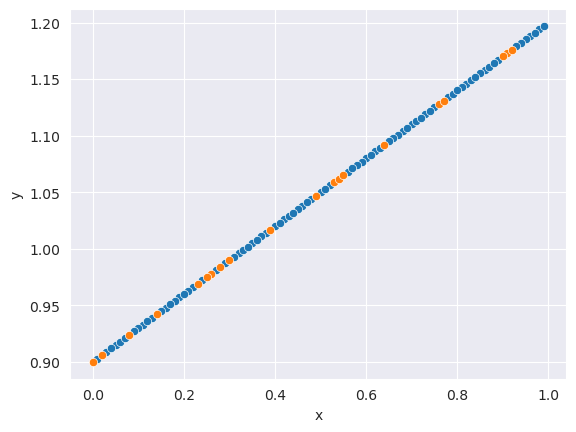

In [50]:
import torch
import seaborn as sns

weight = 0.3
bias = 0.9
random_seed = 42
train_size = 0.8
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

torch.manual_seed(random_seed)
X = torch.arange(start=0, end=1, step=0.01)
y = X * weight + bias

idx = torch.randperm(X.shape[0])
X = X[idx]
y = y[idx]

X_train = X[:int(train_size * X.shape[0])]
y_train = y[:int(train_size * X.shape[0])]
X_test = X[int(train_size * X.shape[0]):]
y_test = y[int(train_size * X.shape[0]):]

ax = sns.scatterplot(x=X_train, y=y_train)
ax = sns.scatterplot(x=X_test, y=y_test)
ax.set(xlabel='x', ylabel='y')
pass

2. Build a PyTorch model by subclassing `nn.Module`.
* Inside should be a randomly initialized `nn.Parameter()` with requires_grad=True, one for weights and one for bias.
* Implement the `forward()` method to compute the linear regression function you used to create the dataset in 1.
* Once you've constructed the model, make an instance of it and check its `state_dict()`.
Note: If you'd like to use `nn.Linear()` instead of `nn.Parameter()` you can.


In [51]:
class LinearRegression(torch.nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = torch.nn.Linear(in_features=1, out_features=1)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear(x)

In [52]:
model = LinearRegression()
model.state_dict()

OrderedDict([('linear.weight', tensor([[-0.9676]])),
             ('linear.bias', tensor([-0.5727]))])

3. Create a loss function and optimizer using `nn.L1Loss()` and `torch.optim.SGD(params, lr)` respectively.
* Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.
* Write a training loop to perform the appropriate training steps for 300 epochs.
* The training loop should test the model on the test dataset every 20 epochs.


In [53]:
def training_loop(model, X_train, y_train, X_test, y_test, epochs):
    loss = torch.nn.L1Loss()
    optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

    for epoch in range(epochs):
        model.train()

        y_pred = model(X_train)
        l_train = loss(y_pred, y_train)
        optimizer.zero_grad()
        l_train.backward()
        optimizer.step()

        if epoch % 20 == 0:
            model.eval()
            with torch.inference_mode():
                y_pred = model(X_test)
                l_test = loss(y_pred, y_test)
                print(f"Train loss = {l_train}, Test loss = {l_test}")

4. Make predictions with the trained model on the test data.
* Visualize these predictions against the original training and testing data (note: you may need to make sure the predictions are not on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).

Train loss = 2.1150238513946533, Test loss = 2.028282403945923
Train loss = 1.8636643886566162, Test loss = 1.7828775644302368
Train loss = 1.6123052835464478, Test loss = 1.5374724864959717
Train loss = 1.3609459400177002, Test loss = 1.2920674085617065
Train loss = 1.109586477279663, Test loss = 1.0466623306274414
Train loss = 0.8582273721694946, Test loss = 0.8012576103210449
Train loss = 0.6068683862686157, Test loss = 0.555853009223938
Train loss = 0.35550951957702637, Test loss = 0.31044840812683105
Train loss = 0.15331952273845673, Test loss = 0.1290087252855301
Train loss = 0.09593093395233154, Test loss = 0.0954846739768982
Train loss = 0.0821426585316658, Test loss = 0.08398169279098511
Train loss = 0.071834996342659, Test loss = 0.0765189528465271
Train loss = 0.06222248822450638, Test loss = 0.06688056886196136
Train loss = 0.05264360457658768, Test loss = 0.0564909353852272
Train loss = 0.04306472837924957, Test loss = 0.046101413667201996


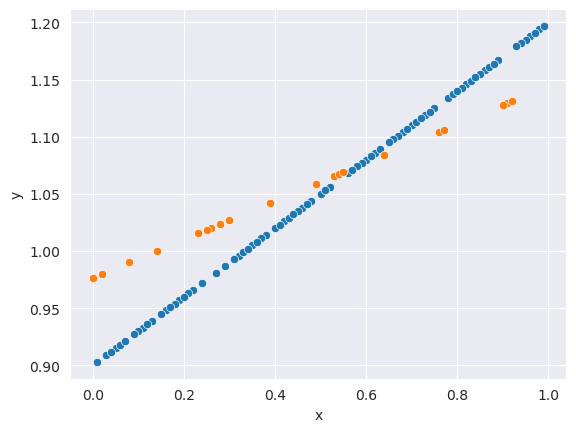

In [54]:
X_train = X_train.unsqueeze(1)
X_test = X_test.unsqueeze(1)
y_train = y_train.unsqueeze(1)
y_test = y_test.unsqueeze(1)
X_train.to(device)
y_train.to(device)
X_test.to(device)
y_test.to(device)

training_loop(model, X_train, y_train, X_test, y_test, epochs=300)

with torch.inference_mode():
    y_pred = model(X_test)
ax = sns.scatterplot(x=X_train.squeeze().cpu(), y=y_train.squeeze().cpu())
ax = sns.scatterplot(x=X_test.squeeze().cpu(), y=y_pred.squeeze().cpu())
ax.set(xlabel='x', ylabel='y')
pass

5. Save your trained model's `state_dict()` to file.
* Create a new instance of your model class you made in 2. and load in the `state_dict()` you just saved to it.
* Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.

In [55]:
torch.save(obj=model.state_dict(), f='test_model.pt')

loaded_model = LinearRegression()
loaded_model.load_state_dict(torch.load('test_model.pt', weights_only=True))
loaded_model.to(device)

loaded_model.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model(X_test.to(device))

y_pred = y_pred.to(device)
(y_pred == loaded_model_preds).cpu()

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])